### __BUSA8001 (S2, 2023) Group Assignment - Predicting Used Car Sale Prices__

--- 

**Kaggle Competition Ends:** Friday, 3 November 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 3 November 2023 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  


**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of **zero** if your code does not produce the forecasts you submit to Kaggle 

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 1 mark: Ranking in the top 5 places of your unit on Kaggle  
- 3 marks: Reaching the first place in the competition   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)

---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: BUSA8001_mschiefs
- Team Leader and Team Member 1: Ha Thanh (Taylor) Chu, 47484039, Task 3
- Team Member 2: Cam Tu Pham (Jenna), 46864598, Task 3
- Team Member 3: Thi Minh Thi Tran, 45773157, Task 3

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
2. Referring to Competition Overview and the data provided on Kaggle write **Problem Description** (about 500 words) focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, 

- Using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you find - do not impute missing values at this stage)
    - You should **not** discuss any specific predictive algorithms at this stage
    - Note: Your written portion of this task should be completed in a single Markdown cell
    
Total Marks: 12


##### 1. Forecasting Problem
The objective of the forecasting problem, based on the dataset provided, is to predict the listing price of a vehicle based on various features, including its specifications, condition, location, and dealer information. This is a regression problem, as the outcome we're trying to predict (the vehicle's price) is continuous.

In the real world, such a prediction model holds immense value. Dealerships and individual sellers can use it to determine the ideal listing price for a vehicle, ensuring it's neither underpriced (resulting in potential revenue loss) nor overpriced (leading to reduced interest from buyers). Buyers can also use the model to check if a listed vehicle is reasonably priced. Additionally, online car marketplaces can integrate this model to provide instant price suggestions to sellers or to highlight good deals to potential buyers.

##### 2. Evaluation Criteria
Although the Kaggle competition link is not directly accessible here, commonly used evaluation metrics for regression problems include the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. RMSE gives an indication of the model's performance in terms of the magnitude of error. A lower RMSE indicates a better fit of the model to the data. For the sake of this exercise, let's assume RMSE is the chosen metric, as it penalizes large errors more than smaller ones, making it sensitive to outliers.

##### 3. Types of Variables/Features
The dataset comprises a mix of categorical, numerical, and boolean features. Here's a breakdown:

Categorical Features: body_type, city, engine_type, exterior_color, interior_color, listing_color, make_name, model_name, transmission, transmission_display, wheel_system.
Numerical Features: city_fuel_economy, daysonmarket, dealer_zip, engine_displacement, highway_fuel_economy, horsepower, latitude, longitude, mileage, savings_amount, seller_rating, year.
Boolean Features: franchise_dealer, has_accidents, is_new.
String Features with Quantitative Information: Many features like back_legroom, front_legroom, fueltankvolume, height, length, power, torque, wheelbase, width are provided as strings but contain numeric data (with units).
##### 4. Data Summary and Main Data Characteristics
The dataset contains information about various vehicles, including their technical specifications, physical attributes, condition, and listing details. The target variable is the price of the vehicle. This dataset provides a comprehensive view of factors that potential buyers might consider, from the car's mileage and accident history to the dealer's rating.

##### 5. Missing Values
Before discussing missing values, let's first identify which columns have them and how many they contain.

`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text and on your video.

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [378]:
import pandas as pd

train_df = pd.read_csv('train.csv')

train_df.head()

vin back_legroom        body_type          city  \
0  SJKCH5CRXHA032566      33.5 in  SUV / Crossover    Great Neck   
1  5LMCJ3D96HUL54638      36.8 in  SUV / Crossover         Wayne   
2  5LMCJ2D95HUL35217      36.8 in  SUV / Crossover         Wayne   
3  2HGFG1B86AH500600      30.3 in            Coupe  Little Ferry   
4  5LMCJ1D95LUL25032      38.6 in  SUV / Crossover         Wayne   

   city_fuel_economy  daysonmarket  dealer_zip  engine_displacement  \
0                NaN            20       11021               2000.0   
1               19.0            64        7470               2300.0   
2               19.0            14        7470               2300.0   
3               25.0            13        7643               1800.0   
4               21.0            14        7470               2000.0   

  engine_type                             exterior_color  ...  savings_amount  \
0          I4                                      Black  ...            1522   
1          I4                     Magnetic Gray Metallic  ...             740   
2          I4  Burgundy Velvet Metallic Tinted Clearcoat  ...             832   
3          I4                                       Blue  ...             983   
4          I4                                        Red  ...               0   

  seller_rating                 torque transmission transmission_display  \
0      3.346154  258 lb-ft @ 1,200 RPM            A    7-Speed Automatic   
1      4.750000  300 lb-ft @ 2,000 RPM            A    6-Speed Automatic   
2      4.750000  300 lb-ft @ 2,000 RPM            A    6-Speed Automatic   
3      3.577778  128 lb-ft @ 4,300 RPM            A    5-Speed Automatic   
4      4.750000  275 lb-ft @ 3,000 RPM            A    8-Speed Automatic   

   wheel_system  wheelbase    width  year  price  
0           AWD   106.3 in    82 in  2017  21495  
1           AWD   105.9 in  84.1 in  2017  22459  
2           AWD   105.9 in  84.1 in  2017  24799  
3           FWD   104.3 in  68.9 in  2010   3750  
4           AWD   106.7 in    83 in  2020  40669  

[5 rows x 39 columns]

In [379]:
def clean_features(data):
    # Features with units that need cleaning
    features_with_units = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'wheelbase', 'width', 'maximum_seating']

    # Extract numerical values from these features
    for feature in features_with_units:
        if data[feature].dtype == 'object':
            data[feature] = data[feature].str.extract('(\d+\.?\d*)').astype(float)
            
    # Display the cleaned features
    print(data[features_with_units].head())

clean_features(train_df)

   back_legroom  front_legroom  fuel_tank_volume  height  length  wheelbase  \
0          33.5           41.3              14.8    60.2   174.2      106.3   
1          36.8           42.8              15.5    65.6   179.2      105.9   
2          36.8           42.8              15.5    65.6   179.2      105.9   
3          30.3           42.6              13.2    55.0   175.5      104.3   
4          38.6           43.2              16.2    64.1   180.6      106.7   

   width  maximum_seating  
0   82.0              5.0  
1   84.1              5.0  
2   84.1              5.0  
3   68.9              5.0  
4   83.0              5.0  


`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [380]:
def new_features(data):
    data['max_torque'] = pd.to_numeric(data['torque'].str.split().str[0])
    data['torque_rpm'] = data['torque'].str.split().str[3]
    data['torque_rpm'] = data['torque_rpm'].str.replace(',', '')
    data['torque_rpm'] = pd.to_numeric(data['torque_rpm'])
    
    data['power_value'] = pd.to_numeric(data['power'].str.split().str[0])
    data['power_rpm'] = data['power'].str.split().str[3]
    data['power_rpm'] = data['power_rpm'].str.replace(',', '')
    data['power_rpm'] = pd.to_numeric(data['power_rpm'])
    
    car['torque_to_power_ratio'] = car['max_torque'] / car['power_value']
    
new_features(train_df)

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both the training and test datasets.   
(3 marks)

In [381]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   3500 non-null   object 
 1   back_legroom          3339 non-null   float64
 2   body_type             3494 non-null   object 
 3   city                  3500 non-null   object 
 4   city_fuel_economy     2912 non-null   float64
 5   daysonmarket          3500 non-null   int64  
 6   dealer_zip            3500 non-null   int64  
 7   engine_displacement   3375 non-null   float64
 8   engine_type           3450 non-null   object 
 9   exterior_color        3500 non-null   object 
 10  franchise_dealer      3500 non-null   bool   
 11  front_legroom         3371 non-null   float64
 12  fuel_tank_volume      3393 non-null   float64
 13  fuel_type             3463 non-null   object 
 14  height                3394 non-null   float64
 15  highway_fuel_economy 

In [376]:
# Load the test dataset
test_df = pd.read_csv('test.csv')

# Define a function to impute missing values
def impute_missing_values(df):
    for column in df.columns:
        # If column data type is object (categorical) then fill missing with mode
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        # If column data type is numerical or boolean then fill missing with median
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

# Impute missing values in training and test datasets
train_df = impute_missing_values(train_df)
test_df = impute_missing_values(test_df)

# Check if there are any missing values left in training and test datasets
missing_train = train_df.isnull().sum().sum()
missing_test = test_df.isnull().sum().sum()

missing_train, missing_test


(0, 0)

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [287]:
car_graph = car.copy()

car = car.copy().drop(['power', 'torque', 'vin', 'latitude', 'longitude', 'listed_date'], axis = 1)

In [288]:
car['dealer_zip'] = car['dealer_zip'].apply(str)

In [289]:
# Define a function to encode categorical variables
def encode_categorical_columns(df):
    for column in df.select_dtypes(include=['object', 'bool']).columns:
        # Set observations with multiple values to 'other'
        df[column] = df[column].apply(lambda x: 'other' if '/' in str(x) else x)
        
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)
            
        # If there are more than 5 unique values, keep the top 5 and set the rest to 'other'
        if df[column].nunique() > 5:
            top_5_values = df[column].value_counts().head(5).index
            df[column] = df[column].apply(lambda x: x if x in top_5_values else 'other')
    
    # One-hot encode the categorical columns
    df = pd.get_dummies(df, drop_first=True)
    return df

# Encode the categorical columns for training and test datasets
car_encoded = encode_categorical_columns(car)

# Display the first few rows of the encoded training dataset
car_encoded.head()

back_legroom  city_fuel_economy  daysonmarket  engine_displacement  \
0          33.5               21.0            20               2000.0   
1          36.8               19.0            64               2300.0   
2          36.8               19.0            14               2300.0   
3          30.3               25.0            13               1800.0   
4          38.6               21.0            14               2000.0   

   franchise_dealer  front_legroom  fuel_tank_volume  height  \
0                 0           41.3              14.8    60.2   
1                 1           42.8              15.5    65.6   
2                 1           42.8              15.5    65.6   
3                 0           42.6              13.2    55.0   
4                 1           43.2              16.2    64.1   

   highway_fuel_economy  horsepower  ...  transmission_M  \
0                  28.0       208.0  ...               0   
1                  25.0       275.0  ...               0   
2                  25.0       275.0  ...               0   
3                  36.0       140.0  ...               0   
4                  29.0       250.0  ...               0   

   transmission_display_6-Speed Automatic Overdrive  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   transmission_display_8-Speed Automatic  transmission_display_Automatic  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   
3                                       0                               0   
4                                       1                               0   

   transmission_display_Continuously Variable Transmission  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   transmission_display_other  wheel_system_4X2  wheel_system_AWD  \
0                           1                 0                 1   
1                           0                 0                 1   
2                           0                 0                 1   
3                           1                 0                 0   
4                           0                 0                 1   

   wheel_system_FWD  wheel_system_RWD  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0  

[5 rows x 85 columns]

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [207]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

car_encoded_X = car_encoded[['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom',
                            'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower',
                            'length', 'maximum_seating', 'mileage',
                            'savings_amount', 'seller_rating', 'wheelbase', 'width',
                            'max_torque', 'torque_rpm', 'power_value', 'power_rpm']]

sc.fit(car_encoded_X)

X = sc.transform(car_encoded_X)

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and carefully write up your findings. 
(2 marks)

In [198]:
! pip install folium

import folium

# Create a map centered on a specific latitude and longitude
m = folium.Map(location=[car_graph['latitude'].iloc[0], car_graph['longitude'].iloc[0]], zoom_start=10)

# Add markers for each point
for index, row in car_graph.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['dealer_zip']).add_to(m)

# Save the map to an HTML file or display it
m.save('map.html')

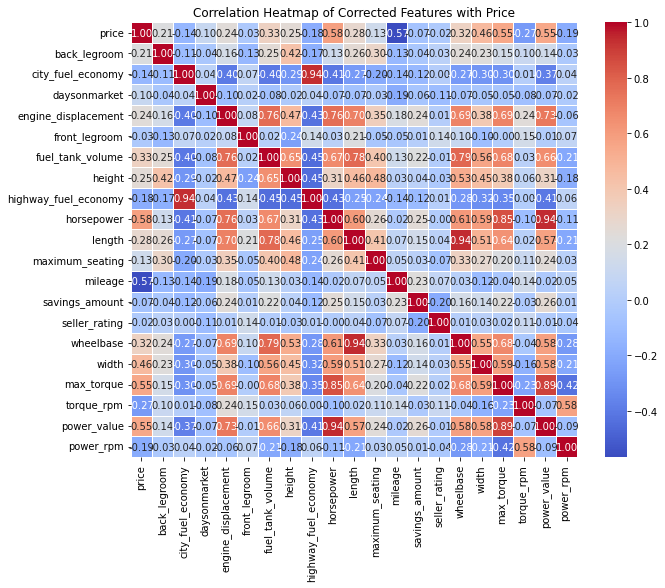

In [290]:
import seaborn as sns

features = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom',
                            'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower',
                            'length', 'maximum_seating', 'mileage',
                            'savings_amount', 'seller_rating', 'wheelbase', 'width',
                            'max_torque', 'torque_rpm', 'power_value', 'power_rpm']

# Extracting the correlation values of the corrected features with 'price'
correlation_matrix = car_encoded[['price'] + features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Corrected Features with Price')
plt.show()


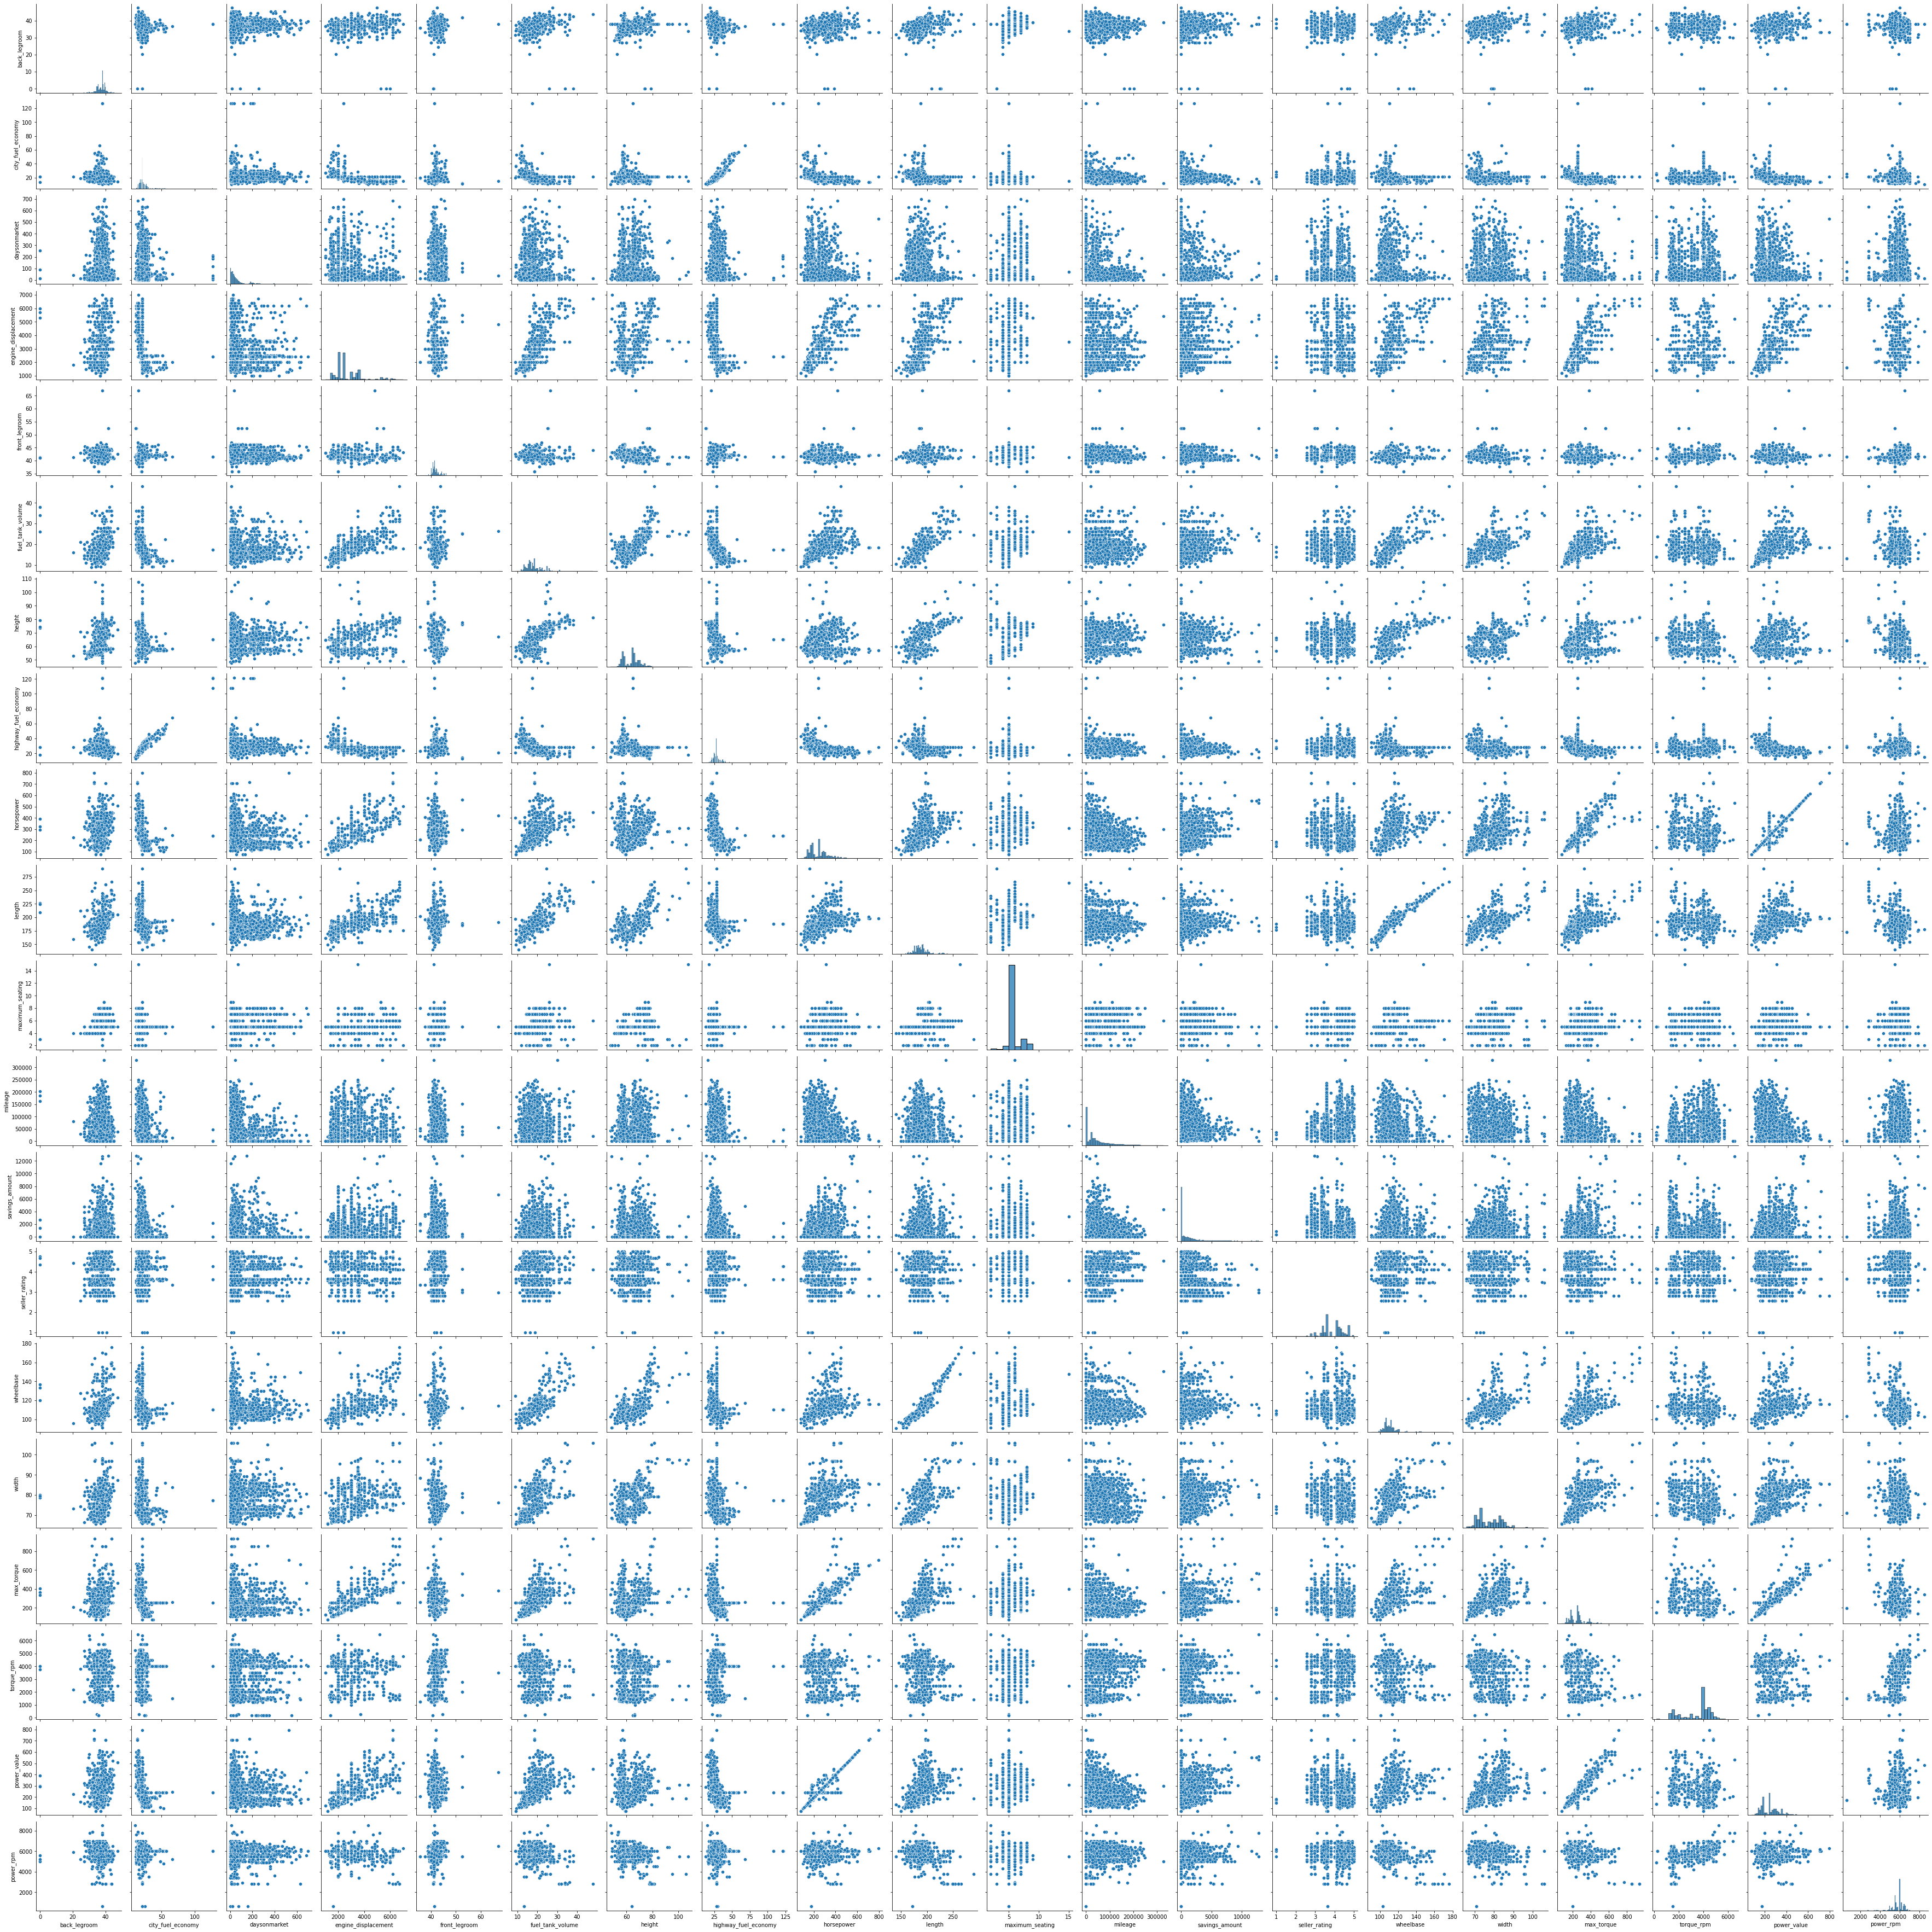

In [367]:
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe

# Create a pairplot
sns.pairplot(car_encoded[['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom',
                            'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower',
                            'length', 'maximum_seating', 'mileage',
                            'savings_amount', 'seller_rating', 'wheelbase', 'width',
                            'max_torque', 'torque_rpm', 'power_value', 'power_rpm']])



# Show the plot
plt.show()

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do both in text and on the recoded video.   
This task must not create any additional features and has to use on the dataset constructed in Task 2.

1. Build at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (Explain Carefully)
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all Kaggle Score   

- Hint: to perform well you will need to iterate Tasks 2 and Task 3.

Total Marks: 12

In [247]:
import numpy as np
from sklearn.model_selection import train_test_split

In [353]:
X = car_encoded.copy().drop(['price'], axis = 1).values

y = car_encoded['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [320]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

models = {
    #'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    #'XGBoost': xgb.XGBRegressor(),
    #'Ridge Regression': Ridge(),
    #'Gradient Boosted Regression Trees': GradientBoostingRegressor(),
    #'Kernel Ridge Regressor' : KernelRidge(),
    #'Support Vector Regressor' : SVR(),
    #'Bagging Regressor' : BaggingRegressor(),
    #'Adaptive Boost Regressor' : AdaBoostRegressor(),
    #'Multi-layer Perceptron Regressor' : MLPRegressor()
}

# Define the parameters for grid search
params = {
    #'Linear Regression': { },
    'Random Forest': { 'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10] },
    #'XGBoost': { 'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7, 9], 'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] },
    #'Ridge Regression': { 'alpha': [0.1, 0.5, 1.0, 5.0, 10.0] },
    #'Gradient Boosted Regression Trees': { 'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10]  },
    #'Kernel Ridge Regressor': {'alpha': [0.1, 1.0, 10.0],'kernel': ['linear', 'polynomial', 'rbf'], 'gamma': [0.1, 1.0, 10.0]},
    #'Support Vector Regressor': {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]},
    #'Bagging Regressor': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]},
    #'Adaptive Boost Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    #'Multi-layer Perceptron Regressor': {'hidden_layer_sizes': [(50,), (100, 50), (100, 100, 50)], 'activation': ['relu', 'tanh']},
}

# Initialize an empty dictionary to store the best models
best_models = {}

# Perform grid search
for model_name in models:
    model = models[model_name]
    param_grid = params[model_name]
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=5, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best {model_name} cross-validation score (MSE): {np.abs(grid_search.best_score_)}")
    print("\n")

KeyboardInterrupt: 

In [36]:
from sklearn.metrics import mean_squared_error

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Test MSE: {mse}")

Random Forest Test MSE: 70403684.4764724
XGBoost Test MSE: 73960433.70615731
Gradient Boosted Regression Trees Test MSE: 75801875.28605482
Bagging Regressor Test MSE: 74854682.43816747
Adaptive Boost Regressor Test MSE: 98358502.52062277
Multi-layer Perceptron Regressor Test MSE: 100785935.8054003


In [343]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf = 2, random_state=42)

estimators = [('Random Forest',  rf), ('Bagging Regressor', BaggingRegressor())]
            
stacking_reg = StackingRegressor(estimators=estimators, final_estimator = DecisionTreeRegressor(random_state = 1))

stacking_reg.fit(X_train, y_train)

y_train_pred_stacking = stacking_reg.predict(X_train)
y_test_pred_stacking = stacking_reg.predict(X_test)


print(f'MSE train: {mean_squared_error(y_train, y_train_pred_stacking):.3f}, test: {mean_squared_error(y_test, y_test_pred_stacking):.3f}')

MSE train: 31154774.597, test: 91655088.151


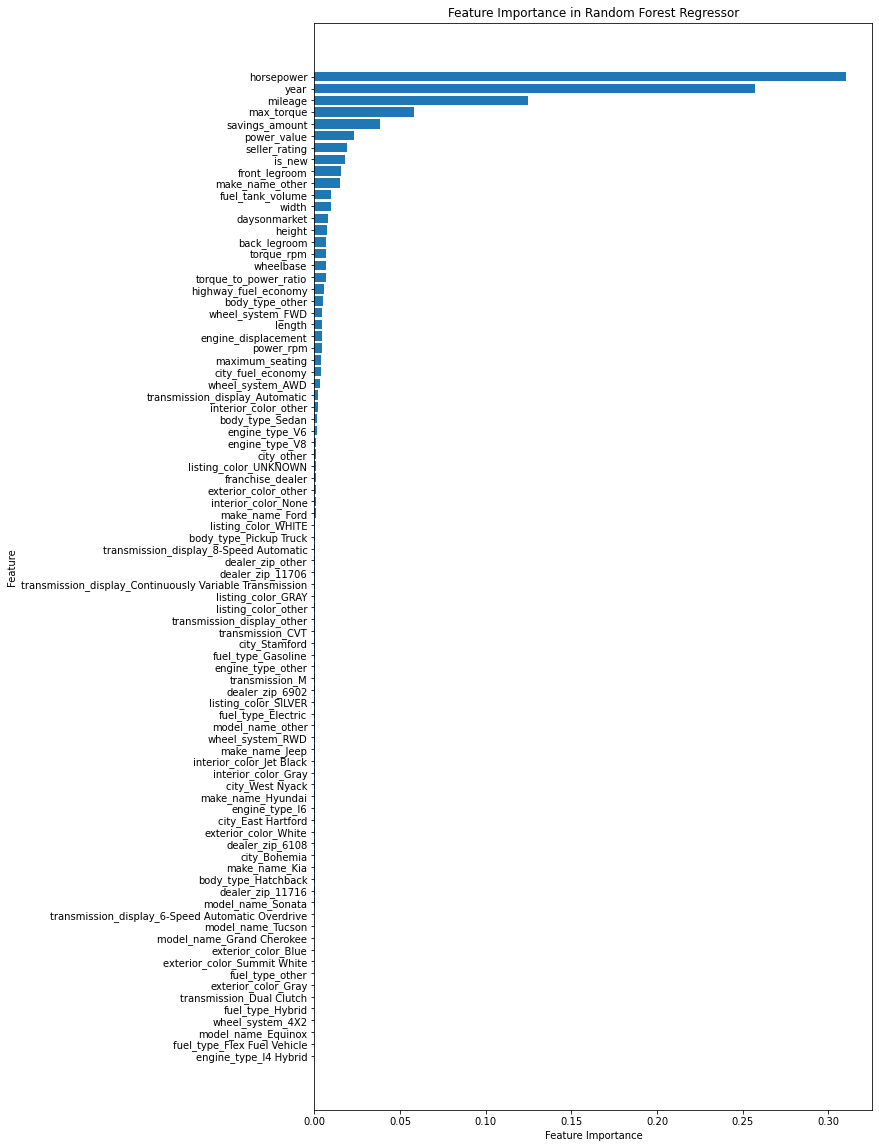

                        Feature    Importance
9                    horsepower  3.101458e-01
18                         year  2.573939e-01
13                      mileage  1.243386e-01
19                   max_torque  5.802078e-02
14               savings_amount  3.797499e-02
..                          ...           ...
51             fuel_type_Hybrid  3.414193e-06
80             wheel_system_4X2  3.285642e-06
67           model_name_Equinox  2.848491e-06
49  fuel_type_Flex Fuel Vehicle  1.902463e-06
38        engine_type_I4 Hybrid  1.607616e-07

[84 rows x 2 columns]


In [256]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a Random Forest Regressor
rf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
train = car_encoded.copy().drop(['price'], axis = 1)
feature_names = train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

# Display the sorted feature importances
print(importance_df)


In [355]:
from sklearn.feature_selection import RFE

rfe = RFE(rf)
rfe.fit(X_train, y_train)

selected_features = rfe.support_

X_train_rfe = X_train[:, selected_features]
X_test_rfe = X_test[:, selected_features]

rf.fit(X_train_rfe, y_train)
rf_rfe_pred = rf.predict(X_test_rfe)

rf_rfe_mse = mean_squared_error(y_test, rf_pred)

print(rf_rfe_mse)

64986393.66985771


In [354]:
rf = RandomForestRegressor(n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf = 2, random_state=42)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)

print(rf_mse)

64986393.66985771


In [265]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf.fit(X_train_pca, y_train)

rf_pca_pred = rf.predict(X_test_pca)

rf_pca_mse = mean_squared_error(y_test, rf_pca_pred)

print(rf_pca_mse)

69702042.88507545


In [261]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=20, kernel='rbf', gamma=15)

X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

rf.fit(X_train_kpca, y_train)

rf_kpca_pred = rf.predict(X_test_kpca)

rf_kpca_mse = mean_squared_error(y_test, rf_kpca_pred)

print(rf_kpca_mse)

339724834.0957772
68411735.5214644


In [356]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 13)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

rf.fit(X_train_lda, y_train)

rf_lda_pred = rf.predict(X_test_lda)

rf_lda_mse = mean_squared_error(y_test, rf_lda_pred)

print(rf_lda_mse)

59284811.048313595


In [344]:
test = pd.read_csv('test.csv')

In [345]:
# Features with units that need cleaning
features_with_units = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'length', 'wheelbase', 'width', 'maximum_seating']

# Extract numerical values from these features
for feature in features_with_units:
    if test[feature].dtype == 'object':
        test[feature] = test[feature].str.extract('(\d+\.?\d*)').astype(float)

# Display the cleaned features
print(test[features_with_units].head())

   back_legroom  front_legroom  fuel_tank_volume  height  length  wheelbase  \
0          37.9           43.0              14.5    68.4   184.5      106.5   
1          39.0           45.3              26.0    74.4   204.0      116.0   
2          35.7           42.2              14.0    56.5   179.9      106.3   
3          35.6           45.5              18.5    57.7   191.1      110.4   
4           NaN            NaN               NaN     NaN     NaN        NaN   

   width  maximum_seating  
0   72.4              7.0  
1   80.5              8.0  
2   70.9              5.0  
3   73.2              5.0  
4    NaN              NaN  


In [346]:
test['max_torque'] = pd.to_numeric(test['torque'].str.split().str[0])
test['torque_rpm'] = test['torque'].str.split().str[3]
test['torque_rpm'] = test['torque_rpm'].str.replace(',', '')
test['torque_rpm'] = pd.to_numeric(test['torque_rpm'])

test['power_value'] = pd.to_numeric(test['power'].str.split().str[0])
test['power_rpm'] = test['power'].str.split().str[3]
test['power_rpm'] = test['power_rpm'].str.replace(',', '')
test['power_rpm'] = pd.to_numeric(test['power_rpm'])

test['torque_to_power_ratio'] = test['max_torque'] / test['power_value']

In [347]:
fillnull(test)

In [348]:
test_ori = test.copy()

test = test.drop(['power', 'torque', 'vin', 'latitude', 'longitude', 'listed_date'], axis = 1)

test['dealer_zip'] = test['dealer_zip'].apply(str)

test_encoded = encode_categorical_columns(test)

In [364]:
diff1 = car_encoded.columns.difference(test_encoded.columns)
print("Columns in df1 that are not in df2:")
print(diff1)

# Find columns in df2 that are not in df1
diff2 = test_encoded.columns.difference(car_encoded.columns)
print("Columns in df2 that are not in df1:")
print(diff2)

Columns in df1 that are not in df2:
Index(['body_type_Hatchback', 'engine_type_I4 Hybrid',
       'exterior_color_Summit White', 'price',
       'transmission_display_Continuously Variable Transmission'],
      dtype='object')
Columns in df2 that are not in df1:
Index(['body_type_Minivan', 'engine_type_V8 Flex Fuel Vehicle',
       'exterior_color_Silver', 'transmission_display_9-Speed Automatic'],
      dtype='object')


In [358]:
X_test_real = test_encoded.copy().values

X_test_real_lda = lda.transform(X_test_real)

y_pred_real = rf.predict(X_test_real_lda)

In [360]:
test_ori['price'] = y_pred_real

test_ori[['vin', 'price']].to_csv('submission_lda.csv', index=False)

In [ ]:
import pickle
pickle.dump(forest, open("forest.pkl", "wb"))

saved_forest = pickle.load(open("forest.pkl", 'rb'))

y_train_pred_saved = saved_forest.predict(X_train)
y_test_pred_saved = saved_forest.predict(X_test)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred_saved):.3f}, test: {mean_squared_error(y_test, y_test_pred_saved):.3f}')

`(Task 3 - insert more cells as required)`

## Marking Criteria

- Marking Rubrics
    - Problem Description - 12 marks
    - Data Cleaning - 12 marks
    - Building Forecasting models - 12 marks
    - Competition Points - 4 marks


- To receive full marks your solutions must satisfy the following criteria:
    - Provide Python solutions that follow the modelling methodology developed in BUSA8001   
    - Written answers explain your logic and Python code in detail, and beformulated in easy to understand full sentences   
    
---
---